# Avance 3: Integracion de datasets y analisis final

Para el analisis final se integraran los dos datasets anteriores (Ver avance 1 y avance 2) y se analizara que insights y/o recomendaciones se pueden sacar de ellos:

Para ello, primero se importaran los datasets y las librerias necesarias:

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_restaurants_chicago=pd.read_csv('df_negocios_chicago.csv')
df_clientes_chicago=pd.read_csv('df_clientes_chicago.csv')

A continuacion se realizaran analisis de correlaciones en cada dataframe para ver que insights se pueden sacaar:

## Correlaciones y analisis de base de datos de clientes:

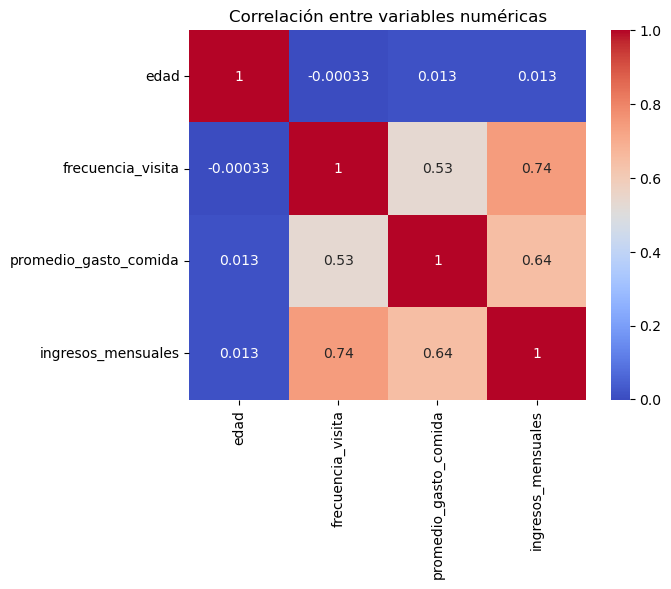

In [9]:
# Primero se busca correlaciones entre variables numericas usando Pearson:
cols=['edad','frecuencia_visita','promedio_gasto_comida','ingresos_mensuales']
corr = df_clientes_chicago[cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlación entre variables numéricas")
plt.show()

Como se puede observar, hay una fuerte correlacion entre ingresos mensuales y frecuencia de visitas y a su vez; una correlacion moderada entre los ingresos mensuales y el promedio de gasto en comida; y una correlacion ligera entre la cantidad de veces que se visita y el promedio de gastos en la comida.

La conclusion: Los ingresos que tiene la persona determina en gran medida la cantidad de veces que saldra y cuanto gastara. La edad no tiene una diferencia notable

A continuacion, se busca correlaciones entre ciertas variables categoricas de interes. Esto se hara a traves de una tabla de contingencia:

In [10]:
variables_categoricas = ['estrato_socioeconomico', 'consume_licor', 'preferencias_alimenticias','membresia_premium']
from itertools import combinations
combis = list(combinations(variables_categoricas, 2))

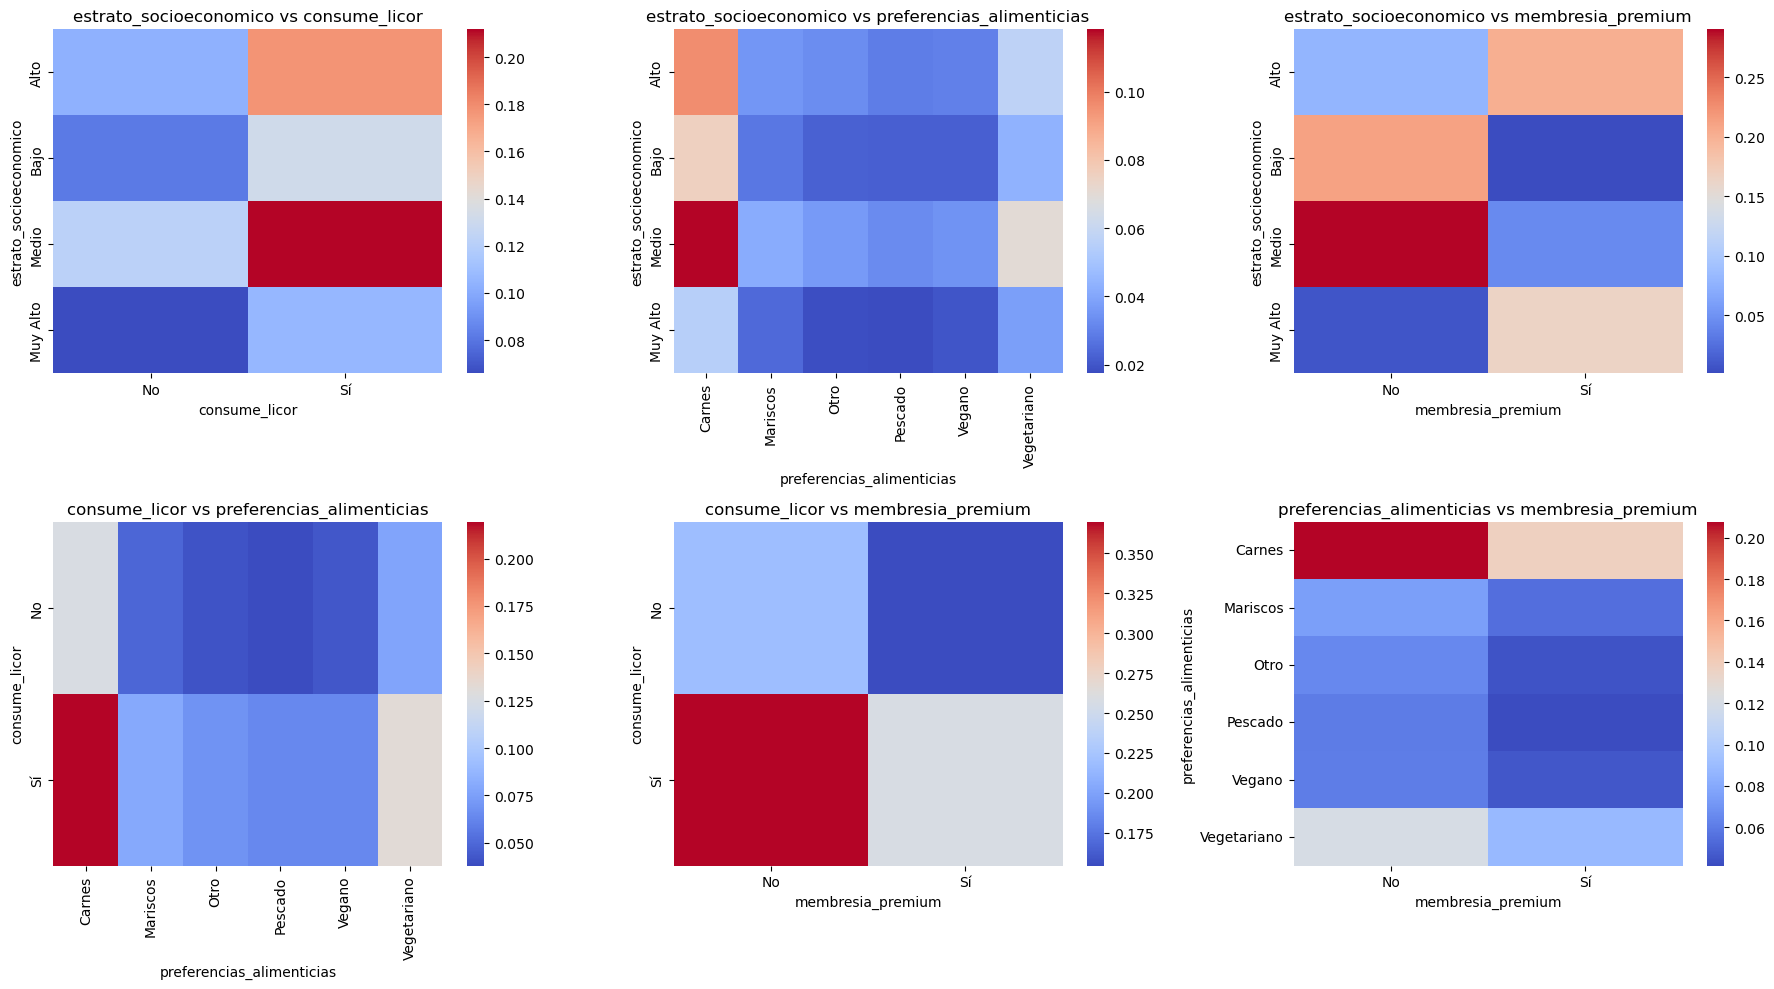

In [13]:
# Definir tamaño de la figura dinámicamente (tantos subplots como pares)
n = len(combis)
cols = 3  # número de columnas en la grilla
rows = (n // cols) + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
axes = axes.flatten()

# Iterar sobre cada combinación y graficar heatmap
for i, (var1, var2) in enumerate(combis):
    # Tabla de contingencia normalizada por filas
    contingencia = pd.crosstab(
        df_clientes_chicago[var1],
        df_clientes_chicago[var2],normalize='all'
    )
    
    sns.heatmap(contingencia, cmap="coolwarm", ax=axes[i], cbar=True)
    axes[i].set_title(f"{var1} vs {var2}", fontsize=12)
    axes[i].set_xlabel(var2)
    axes[i].set_ylabel(var1)

# Eliminar subplots vacíos (si no es múltiplo exacto de cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Se puede observar lo siguiente con estos mapas de calor/tablas de contingencia:
1. Estrato socioeconómico
- El estrato medio concentra la mayor proporción de consumo de licor y de membresías premium.
- Estrato bajo casi no tiene membresía premium.
- Estrato muy alto y bajo consumen menos licor que el medio.

2. Consumo de licor
-  Quienes consumen licor prefieren más carnes y vegetales
- También muestran mayor proporción de membresías premium.

3. Preferencias alimenticias

- Los clientes que prefieren carnes son los que más tienen membresía premium.
- Los que prefieren pescado, vegano o vegetariano tienen menor proporción premium.

4. Membresía premium
- Se concentra en estrato medio-alto y en clientes que consumen licor y prefieren carnes.
- Estratos bajos y preferencias veganas/pescado tienen baja adopción.
- ofertas exclusivas o descuentos premium podrían enfocarse en estratos medio-alto.

A continuacion se realizara otro analisis con diferentes variables, combinando categoricas y numericas:

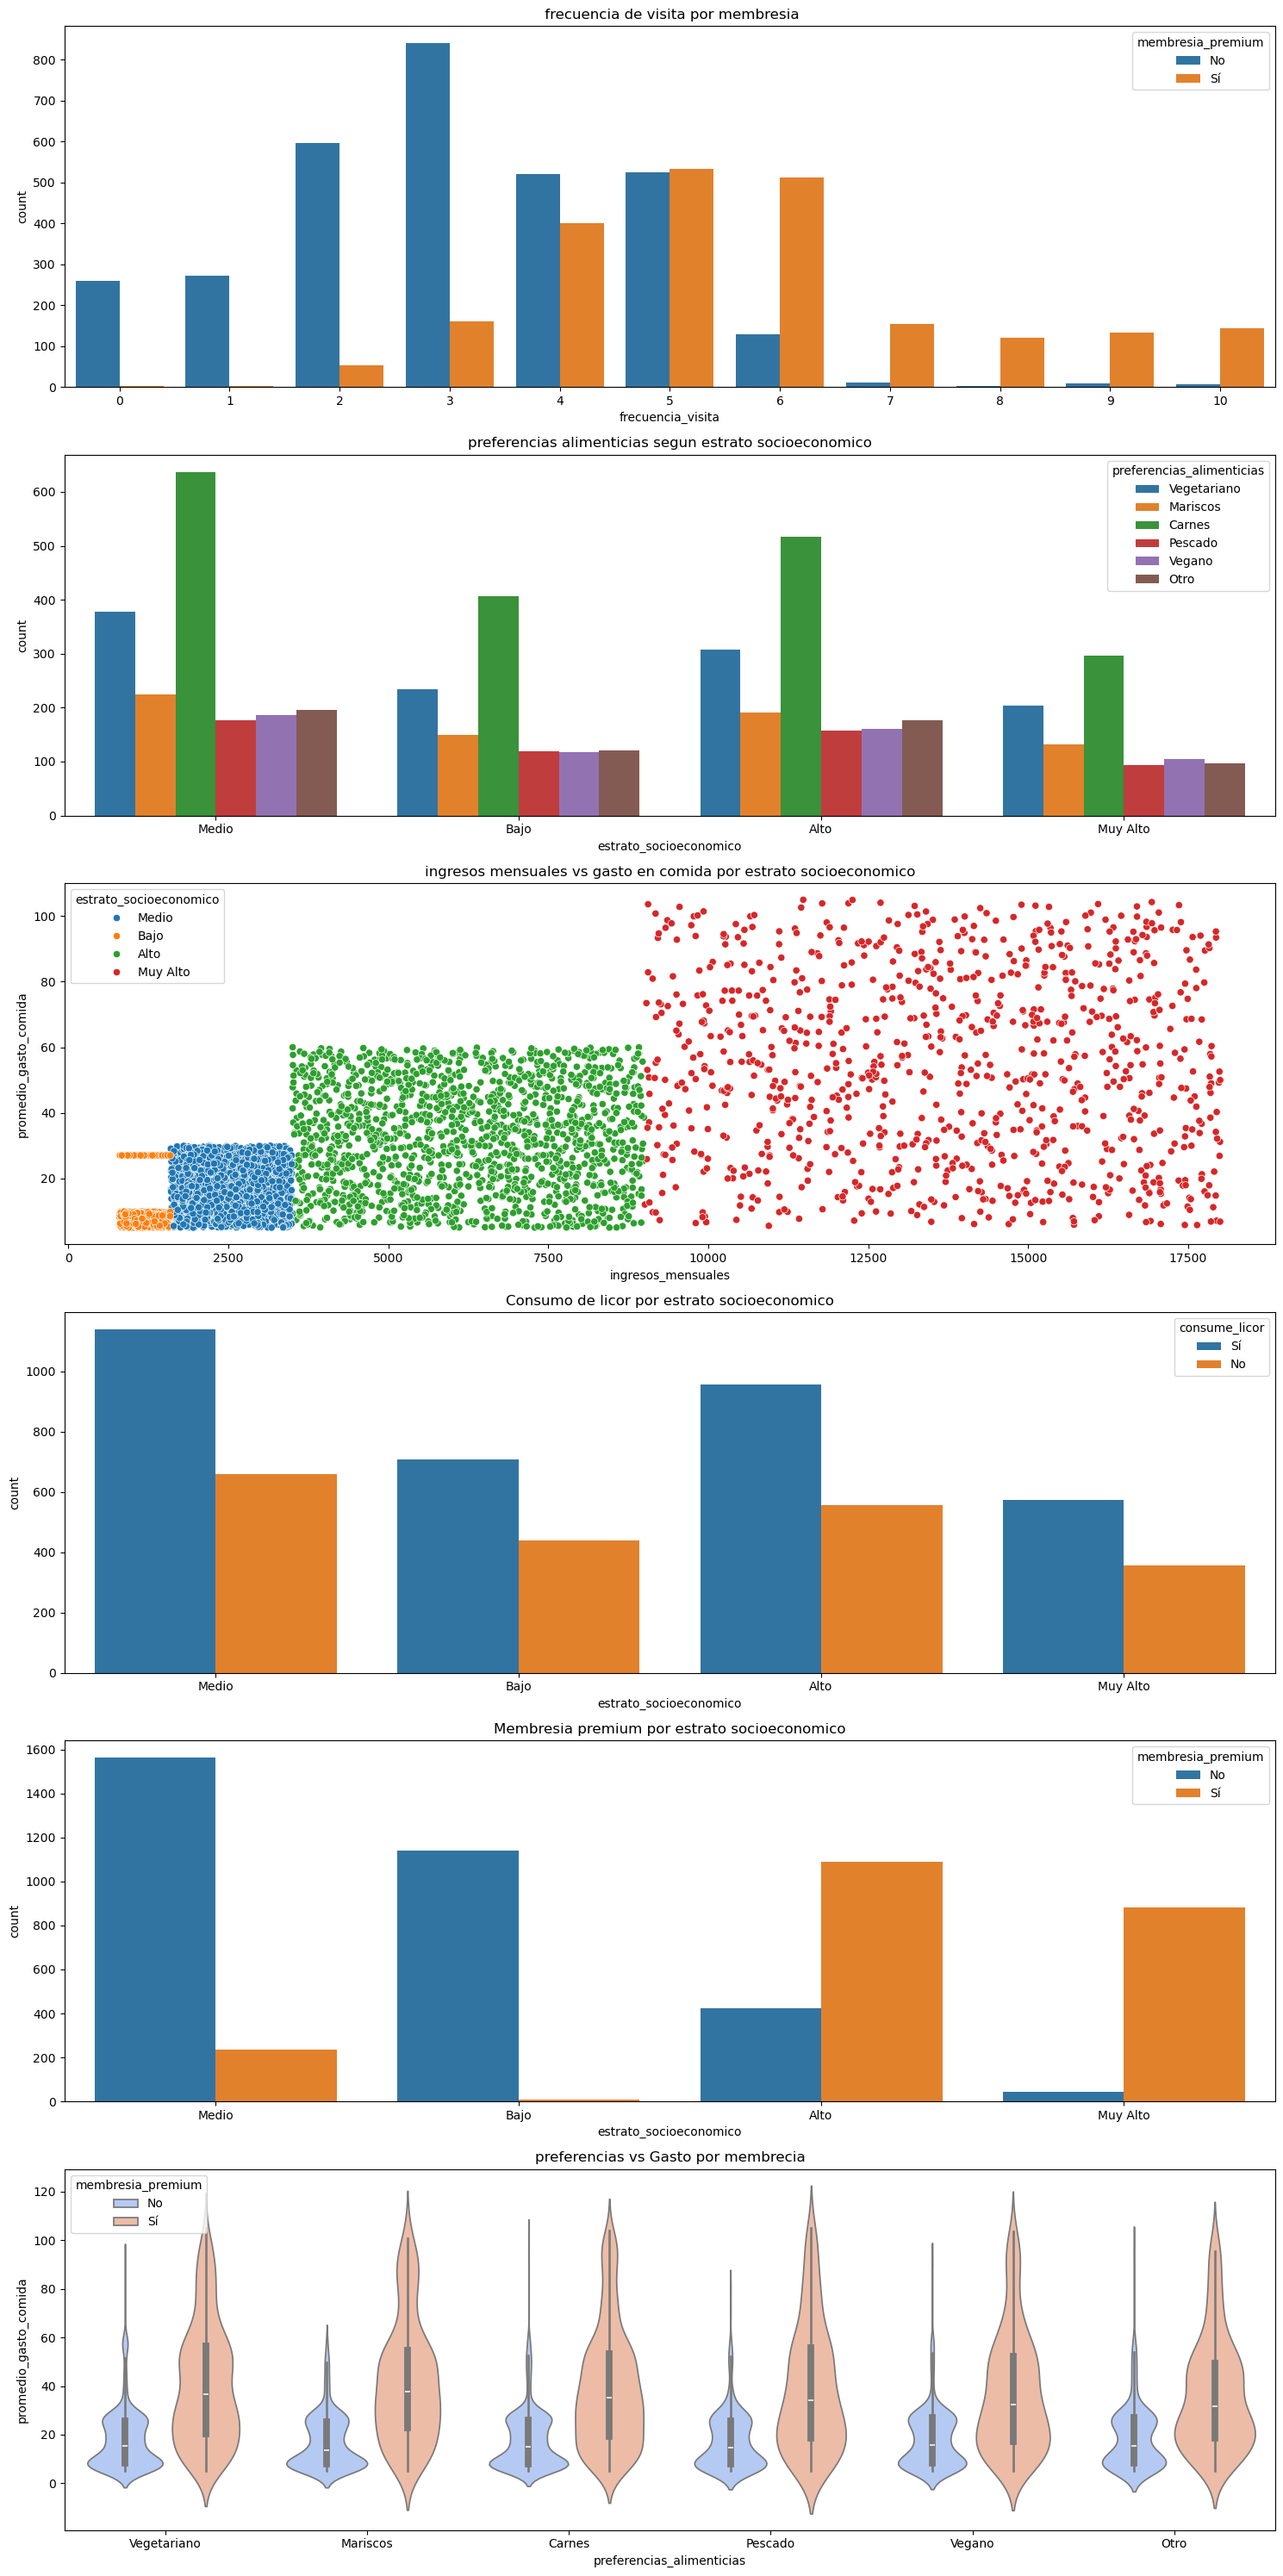

In [32]:
# Creacion de fig:
fig, axes = plt.subplots(6, 1, figsize=(15, 30))
axes = axes.flatten() # Aplanado de axes para facilitar el plot

sns.countplot(
    x="frecuencia_visita",
    hue="membresia_premium",
    data=df_clientes_chicago,
    ax=axes[0]
)
axes[0].set_title(" frecuencia de visita por membresia")

sns.countplot(
    x="estrato_socioeconomico",
    hue="preferencias_alimenticias",
    data=df_clientes_chicago,
    ax=axes[1]
)
axes[1].set_title("preferencias alimenticias segun estrato socioeconomico")

sns.scatterplot(
    x="ingresos_mensuales",
    y="promedio_gasto_comida",
    data=df_clientes_chicago,
    hue='estrato_socioeconomico',
    ax=axes[2]
)
axes[2].set_title("ingresos mensuales vs gasto en comida por estrato socioeconomico")

sns.countplot(
    x="estrato_socioeconomico",
    data=df_clientes_chicago,
    hue='consume_licor',
    ax=axes[3]
)
axes[3].set_title("Consumo de licor por estrato socioeconomico")

sns.countplot(
    x="estrato_socioeconomico",
    data=df_clientes_chicago,
    hue='membresia_premium',
    ax=axes[4]
)
axes[4].set_title("Membresia premium por estrato socioeconomico")

sns.violinplot(
    x="preferencias_alimenticias",
    y="promedio_gasto_comida",
    hue="membresia_premium",
    palette='coolwarm',
    data=df_clientes_chicago,
    ax=axes[5]
)
axes[5].set_title("preferencias vs Gasto por membrecia")

# Ajuste de layout
plt.tight_layout()
plt.show()


1. Conclusiones:
- A mayores ingreso, mayor es el gasto en comida (relación lineal esperada)
- Para estratos bajos/medios, se podrian ofrecer descuentos, promociones o planes de pago
- Estrato medio y alto consumen más licor. Estratos bajos y muy altos consumen menos
- La preferencia alimenticia es independiente del estrato y es predominantemente carnes y vegetariano
- Los clientes con membresia premium tienden a ir mas seguido (5-9 visitas). No hay clientes sin membresia que vayan mucho (mas de 4 veces), ni clientes con membresia que vayan poco (1-3 veces). Por lo que su conversion a Premium es de suma importancia
- La mayoria de clientes con membresia premium son en su mayormente estratos altos y muy altos, habiendo muy pocos en estratos medios y casi ninguno con estratos bajos. Sin embargo, se ve que la membresia tiene un rol fundamental tanto en la frecuencia de visitas como en el promedio de gastos de comida.

2. Recomendaciones
- Se podrian ofrecer combos de comida + licor para el estrato medio y alto
- Promocionar opciones sin alcohol o mocktails para estratos muy altos y bajos.
- Campañas de conversion de clientes a premium generan bastantes beneficios
- Promocionar restaurantes que se enfoquen en carnes y vegetariano principalmente 
- La mayor cantidad de clientes son de estrato medio, por lo que campañas personalizadas para ellos con restaurantes carnes/vegetariano mas opcion de alcohol es una buena estrategia. Una fuerte iniciativa en convertirlos a clientes premium es fundamental, ya que esta demostrada la relacion lineal entre premium, frecuencia y gasto. Se debe enfatizar en recomendar a los estratos medios restaurantes que no sean muy caros ya que estos no tienen un alto poder adquisitivo (bajos ingresos mensuales)
- Los clientes de estratos altos y muy altos tambien prefieren carnes, vegetariano. A su vez, tambien prefieren consumir alcohol pero en una menor medida. Una caracteristica importante es que gastan mucho mas en comida que las personas de clase media o baja, y tienen una mayor frecuencia de visita, por lo que se les podria recomendar restaurantes mas caros y que ofrezcan otros beneficios premium para aumentar la ganancia.